In [2]:
%pip install mne
import numpy as np
import pandas as pd
import mne
import matplotlib.pyplot as plt
import seaborn as sns


  Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_11_0_arm64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 19.0 MB/s eta 0:00:00a 0:00:01
Using cached MarkupSafe-3.0.2-cp313-cp313-macosx_11_0_arm64.whl (12 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("danizo/eeg-dataset-for-adhd")

print("Path to dataset files:", path)


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 47.1M/47.1M [00:03<00:00, 16.0MB/s]

Extracting files...


Path to dataset files: /Users/optimus/.cache/kagglehub/datasets/danizo/eeg-dataset-for-adhd/versions/1


In [ ]:
file_path = r"/Users/optimus/.cache/kagglehub/datasets/danizo/eeg-dataset-for-adhd/versions/1/adhdata.csv"
data = pd.read_csv(file_path)

In [7]:
data.head()


Fp1    Fp2     F3     F4     C3     C4     P3     P4     O1     O2  ...  \
0  261.0  402.0   16.0  261.0  126.0  384.0  126.0  236.0   52.0  236.0  ...   
1  121.0  191.0  -94.0   85.0   16.0  200.0  126.0   52.0  347.0  273.0  ...   
2  -55.0   85.0 -204.0   15.0  -57.0  200.0   52.0  126.0  236.0  200.0  ...   
3  191.0   85.0   52.0   50.0   89.0  236.0  163.0   89.0   89.0   89.0  ...   
4  -55.0 -125.0 -204.0 -160.0 -204.0   16.0 -241.0 -241.0   89.0   16.0  ...   

      F8     T7     T8     P7     P8     Fz     Cz     Pz  Class    ID  
0   16.0  200.0  494.0  126.0  236.0  121.0  367.0  121.0   ADHD  v10p  
1  -57.0  126.0  347.0   52.0   52.0   15.0  121.0  -19.0   ADHD  v10p  
2  -94.0  126.0  420.0   52.0  126.0  -55.0  261.0   85.0   ADHD  v10p  
3  -57.0  236.0  420.0  126.0  126.0   15.0   85.0  -55.0   ADHD  v10p  
4 -131.0   89.0  310.0  -57.0   52.0  -55.0   15.0 -336.0   ADHD  v10p  

[5 rows x 21 columns]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2166383 entries, 0 to 2166382
Data columns (total 21 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Fp1     float64
 1   Fp2     float64
 2   F3      float64
 3   F4      float64
 4   C3      float64
 5   C4      float64
 6   P3      float64
 7   P4      float64
 8   O1      float64
 9   O2      float64
 10  F7      float64
 11  F8      float64
 12  T7      float64
 13  T8      float64
 14  P7      float64
 15  P8      float64
 16  Fz      float64
 17  Cz      float64
 18  Pz      float64
 19  Class   object 
 20  ID      object 
dtypes: float64(19), object(2)
memory usage: 347.1+ MB


<Axes: xlabel='Class', ylabel='count'>

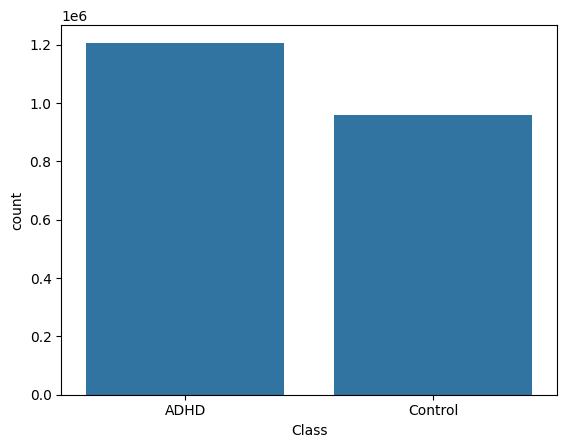

In [9]:
sns.countplot(x=data['Class'], data=data)


In [10]:
patient = data[data.ID == 'v10p']

In [11]:
channel_names = data.columns.tolist()
channel_names.remove('Class')
channel_names.remove('ID')


In [12]:
# Define sampling frequency
sfreq = 128  # Sampling frequency in Hz

# Create MNE info object
info = mne.create_info(ch_names=channel_names, sfreq=sfreq, ch_types='eeg')

# Display the MNE info object
print(info)


<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 19 EEG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 128.0 Hz
>


In [13]:
# Set the montage using standard 10-20 system
montage = mne.channels.make_standard_montage('standard_1020')
info.set_montage(montage)

# Display the updated MNE info object with montage
print(info)


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T7, T8, P7, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 64.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 128.0 Hz
>


In [14]:
# Convert DataFrame to NumPy array
eeg_adhd_data = patient.drop(['Class','ID'], axis=1)
eeg_adhd_data = eeg_adhd_data.values.T  # Transpose to have channels as rows and samples as columns

# Create RawArray object with EEG data and MNE info
raw_adhd = mne.io.RawArray(eeg_adhd_data, info)

# Display the Raw object
print(raw_adhd)


Creating RawArray with float64 data, n_channels=19, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.
<RawArray | 19 x 14304 (111.8 s), ~2.1 MiB, data loaded>


Attempting to create new mne-python configuration file:
/Users/optimus/.mne/mne-python.json
Using matplotlib as 2D backend.


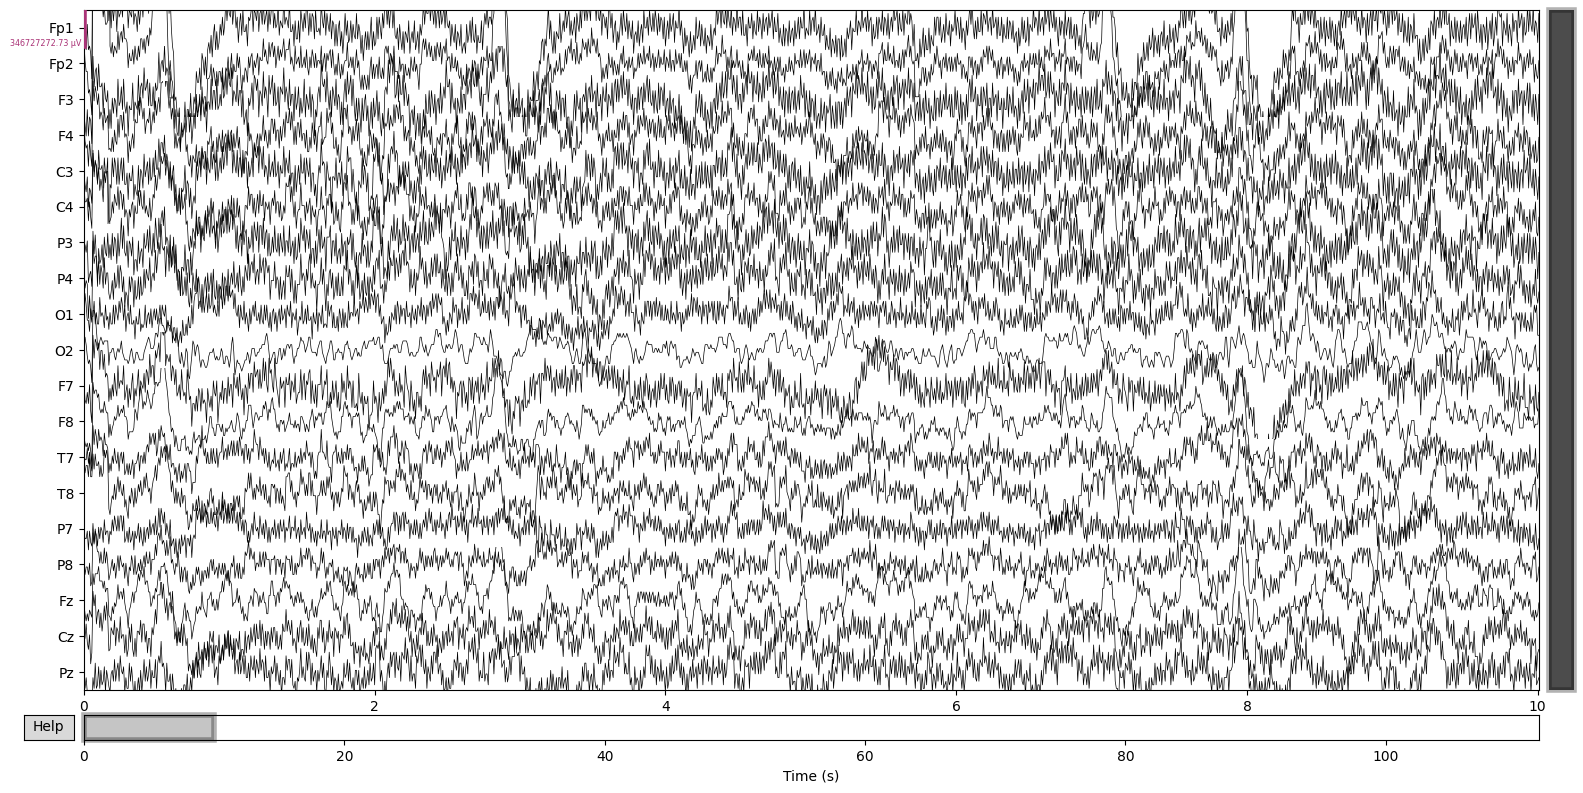

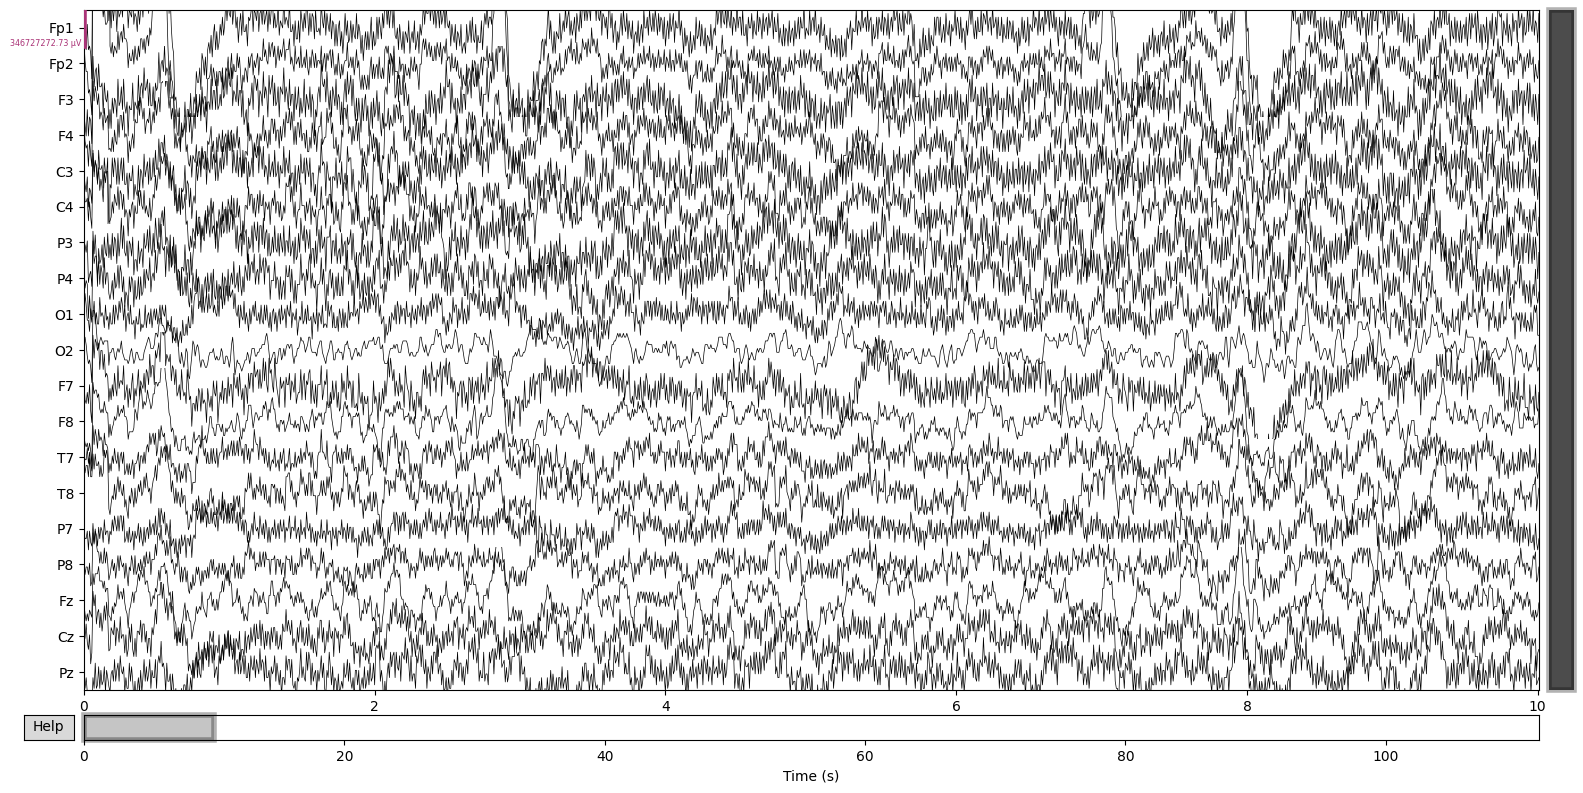

In [15]:
# Plot raw EEG data
mne.set_config('MNE_BROWSE_RAW_SIZE','16,8')  
raw_adhd.plot(n_channels=len(channel_names), scalings='auto', title='Raw EEG Data')


NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 16.000 (s)
Plotting power spectral density (dB=True).


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/mne/viz/utils.py:158: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)
/var/folders/lr/swb8y6y93_xbwwzjfv5z_zxm0000gn/T/ipykernel_24436/122309926.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


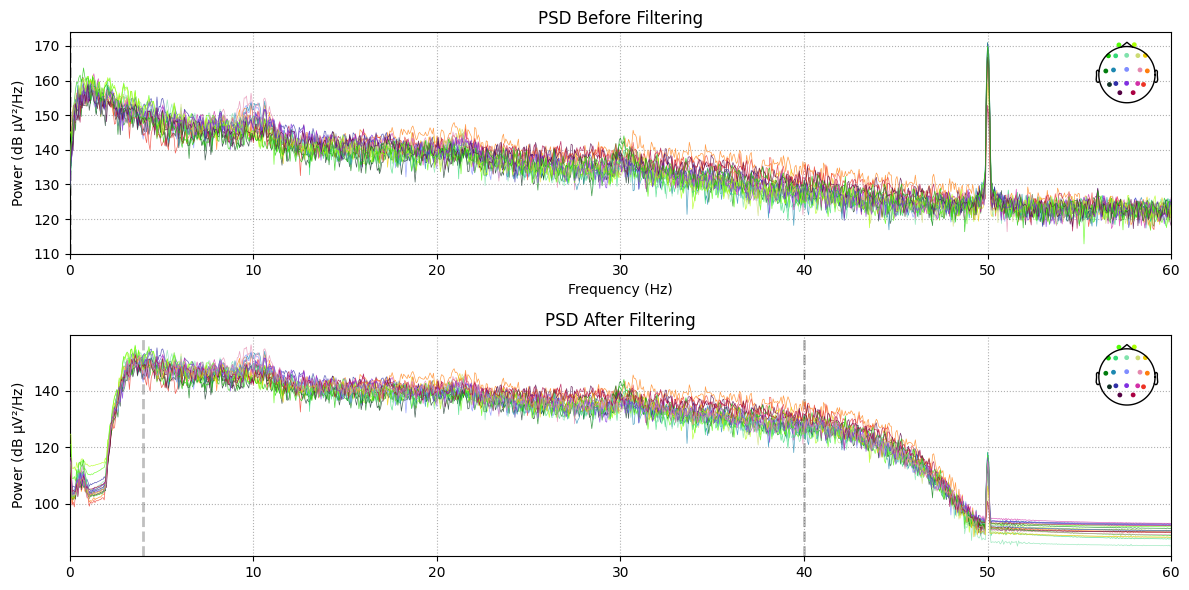

In [16]:
# Apply bandpass filter (4-40 Hz)
raw_adhd_filtered = raw_adhd.copy().filter(l_freq=4, h_freq=40, method='fir', verbose=False)

# Plot PSD before and after filtering
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12, 6))

# PSD Before Filtering
ax1 = fig.add_subplot(2, 1, 1)
raw_adhd.plot_psd(fmax=60, ax=ax1)  # Replace compute_psd with plot_psd
ax1.set_title('PSD Before Filtering')

# PSD After Filtering
ax2 = fig.add_subplot(2, 1, 2)
raw_adhd_filtered.plot_psd(fmax=60, ax=ax2)  # Replace compute_psd with plot_psd
ax2.set_title('PSD After Filtering')

plt.tight_layout()
plt.show()


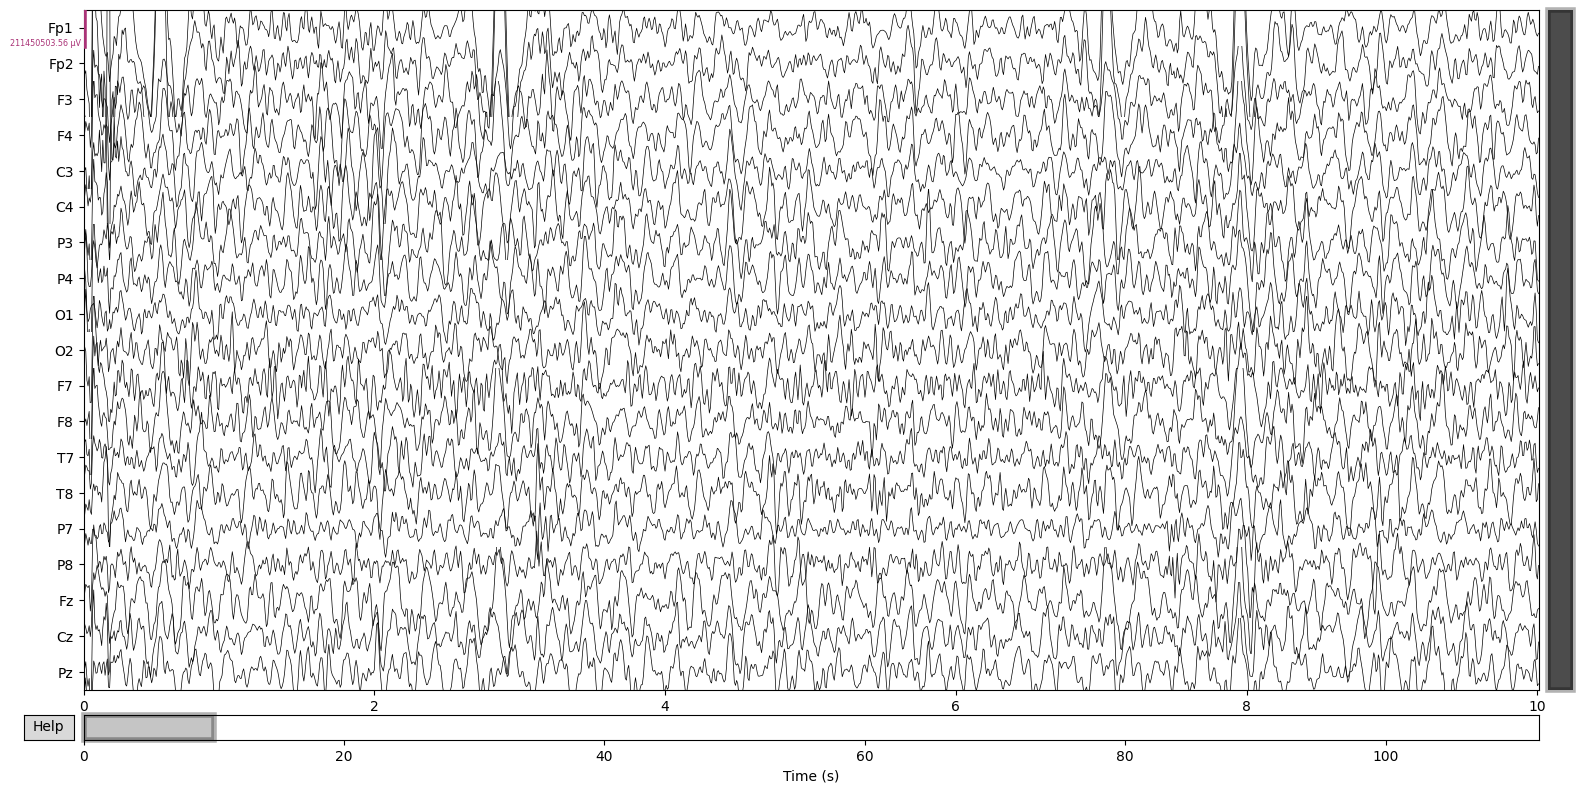

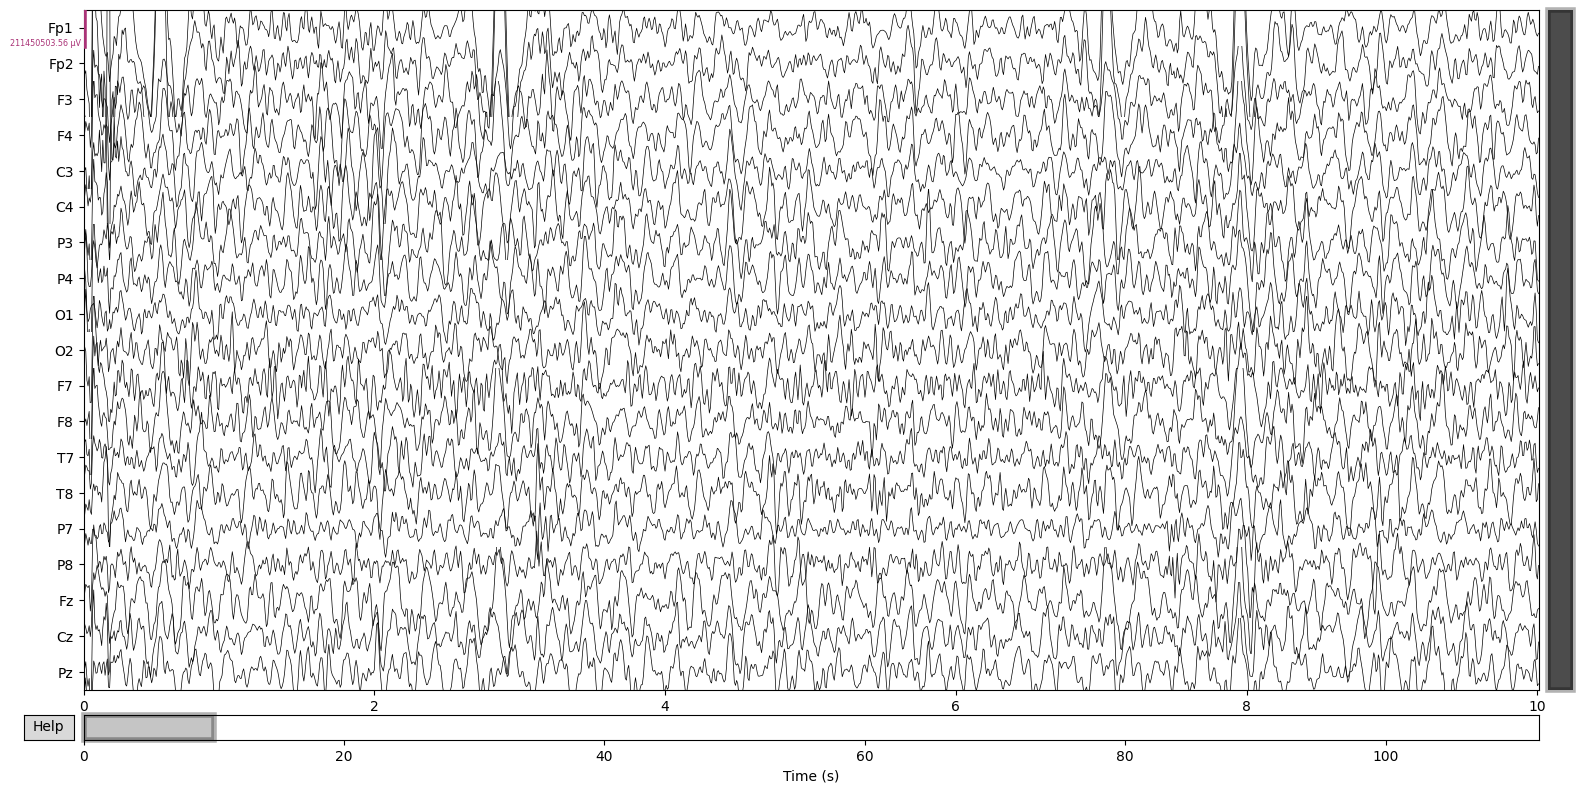

In [17]:
raw_adhd_filtered.plot(scalings='auto')


In [18]:
from mne.preprocessing import ICA

# Initialize ICA
ica_adhd = ICA(n_components=19, random_state=42)

# Fit ICA to the preprocessed data
ica_adhd.fit(raw_adhd_filtered)


Fitting ICA to data using 19 channels (please be patient, this may take a while)
Selecting by number: 19 components
Fitting ICA took 0.2s.


<ICA | raw data decomposition, method: fastica (fit in 35 iterations on 14304 samples), 19 ICA components (19 PCA components available), channel types: eeg, no sources marked for exclusion>

In [19]:
# Identify components related to ocular artifacts
eog_inds, scores = ica_adhd.find_bads_eog(raw_adhd_filtered, ch_name=['Fp1','Fp2','F7','F8'], threshold=3)
print(eog_inds)


Using EOG channels: Fp1, Fp2, F7, F8
... filtering ICA sources
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 1280 samples (10.000 s)

... filtering target
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s


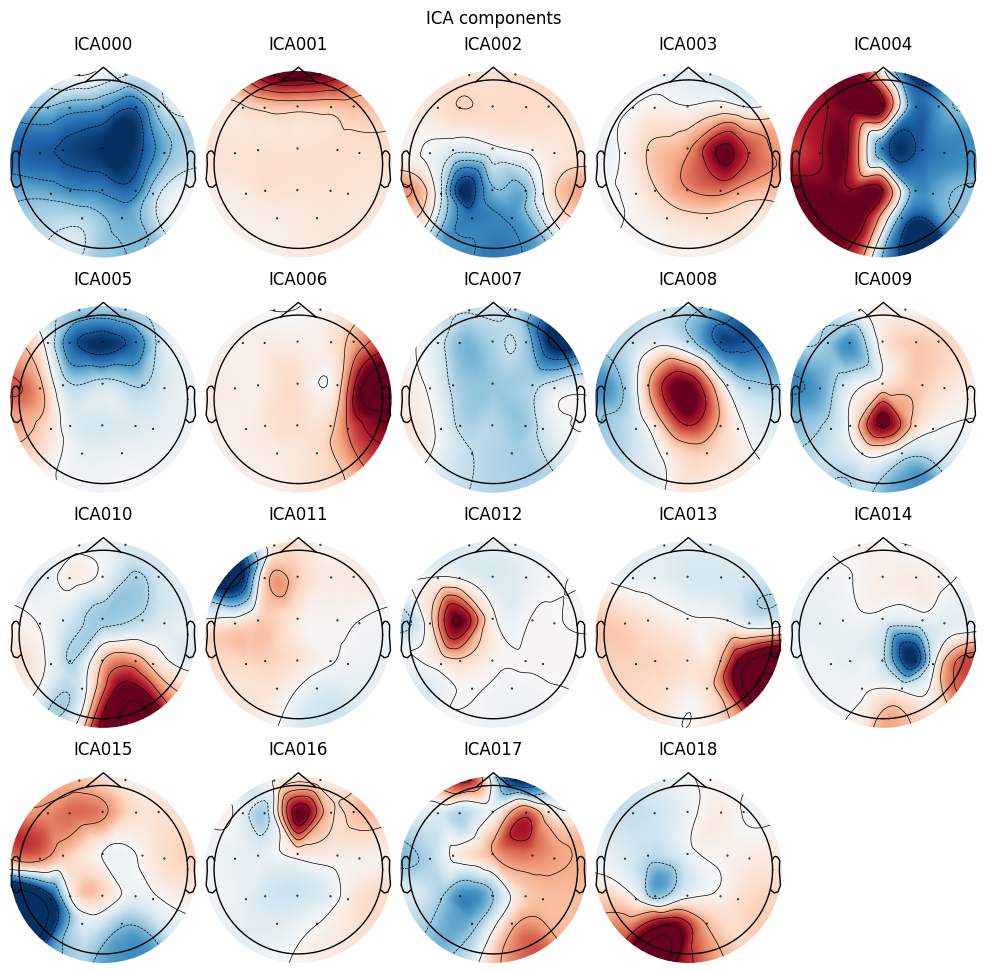

Creating RawArray with float64 data, n_channels=19, n_times=14304
    Range : 0 ... 14303 =      0.000 ...   111.742 secs
Ready.


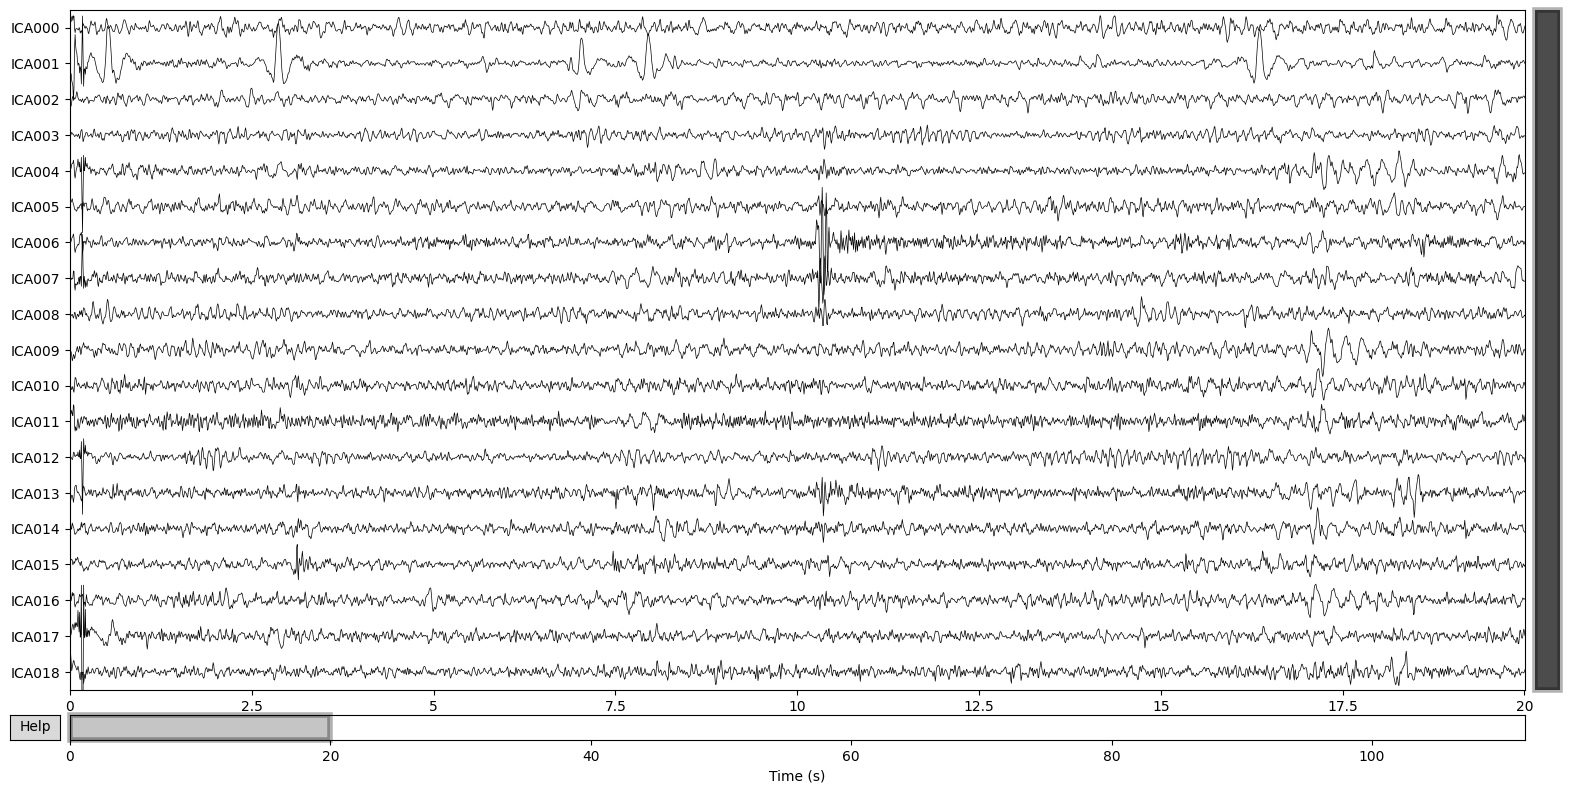

<Figure size 640x480 with 0 Axes>

In [20]:
# Plot ICA components in topographic maps
ica_adhd.plot_components()

# Plot ICA components in waveform
ica_adhd.plot_sources(raw_adhd_filtered)
plt.set_cmap('viridis')  # Change 'viridis' to your desired colorscale
plt.show()


In [21]:
# Exclude identified components from the ICA decomposition
ica_adhd.exclude = [6,10,14,16]

# Apply ICA to remove ocular artifacts
cleaned_raw_adhd = raw_adhd_filtered.copy()
cleaned_eeg_adhd = ica_adhd.apply(cleaned_raw_adhd)


Applying ICA to Raw instance
    Transforming to ICA space (19 components)
    Zeroing out 4 ICA components
    Projecting back using 19 PCA components


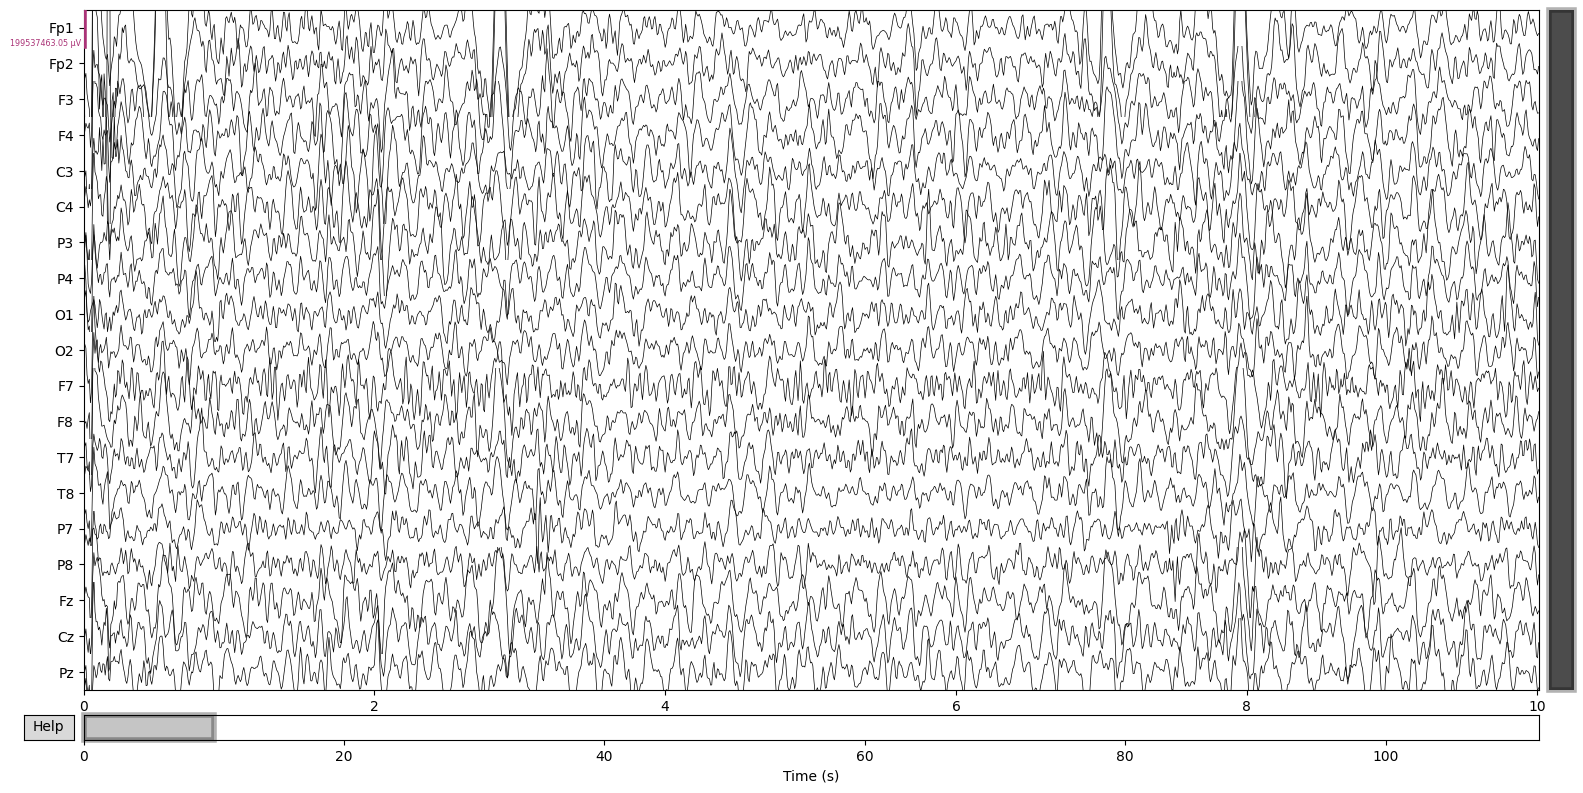

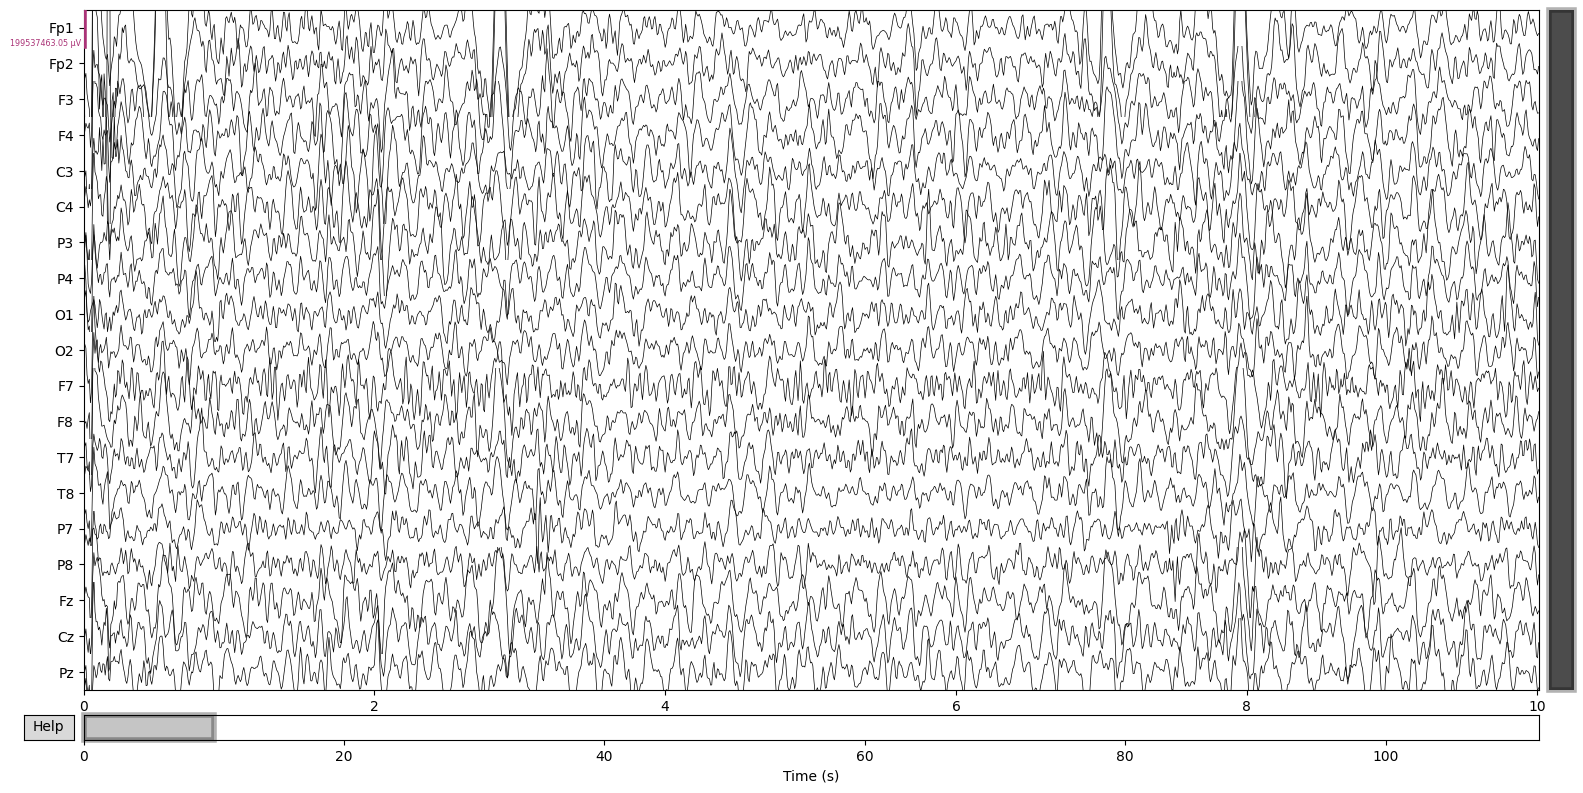

In [22]:
cleaned_eeg_adhd.plot(scalings='auto')


In [23]:
eeg_adhd = cleaned_eeg_adhd.get_data()
eeg_adhd_df = pd.DataFrame(eeg_adhd.T, columns = channel_names, index=None)


In [24]:
eeg_adhd_df.head()


Fp1         Fp2          F3          F4          C3          C4  \
0   -0.001297   -0.000489    0.002098   -0.004131    0.003174    0.001686   
1 -282.487023 -310.565123 -180.611259 -233.415922 -143.340309 -201.540976   
2 -255.529634 -335.602462 -134.140650 -200.553501  -88.570842 -145.289079   
3 -369.589500 -584.963199 -154.277715 -352.847579 -136.991792 -248.468734   
4 -416.128569 -679.073775 -161.984545 -402.876881 -206.832626 -311.654313   

           P3          P4          O1          O2          F7          F8  \
0    0.006191    0.020958    0.001882   -0.012902    0.002571   -0.009907   
1  -30.678461 -104.455600  272.539474   30.277457 -211.902369 -139.957174   
2   38.276717  -70.557924  184.933431    9.199077 -201.460904 -119.519602   
3  -65.997232 -200.123092   12.311100 -140.855060 -240.008843 -243.046335   
4 -232.942044 -289.516210  -45.397783 -189.165524 -186.701139 -274.741303   

          T7          T8         P7          P8          Fz          Cz  \
0   0.002037   -0.015978   0.002487   -0.012397   -0.016000    0.002133   
1 -94.777455 -120.116896 -79.041980 -163.806458 -202.242000 -194.124724   
2 -50.157621  -93.330049 -33.626961 -125.943124 -159.990292 -164.939443   
3 -61.968372 -164.880984 -65.232041 -160.603344 -241.323867 -280.273235   
4 -75.315069 -199.397254 -93.872677 -181.440854 -291.348446 -327.630814   

           Pz  
0    0.002593  
1  -76.489966  
2  -37.711640  
3 -167.385659  
4 -316.243940

In [25]:
len(eeg_adhd_df)

14304